<h1>Connectionist Computing (COMP30230/41390) - Programming Assignment</h1>
<h3>(Exceptional Part)</h3>
<br>
Student Name: **Fan Li** <br>
Student Number: **16212155** 

--------

<h3> Multilayer Perceptron (MLP) for "Letter Recognition": </h3>

<h4> Import packages for calculation, plotting and pre-processing</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

<h4> Import and pre-process the dataset</h4>

In [2]:
dataset = pd.read_csv('letter-recognition.data',delimiter=',',header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [25]:
X = np.array(dataset.iloc[:, 1:17])
y = [ord(item) - ord('A') for item in dataset.iloc[:, 0]]
import keras  # Only used for data pre-processing 
y = keras.utils.to_categorical(y, num_classes=None)

In [4]:
X.shape

(20000, 16)

In [5]:
y.shape

(20000, 26)

In [6]:
def data_split(X, y, percentage):
    train_index = np.random.choice(X.shape[0], size=round(X.shape[0] * percentage), replace=False)
    inverse = np.ones(X.shape[0], dtype=np.bool)
    inverse[train_index] = 0
    test_index = inverse
    return X[train_index], y[train_index], X[test_index], y[test_index]

In [7]:
X_train, y_train, X_test, y_test = data_split(X, y, 0.8)

In [8]:
X_train.shape

(16000, 16)

In [9]:
y_train.shape

(16000, 26)

In [10]:
X_test.shape

(4000, 16)

In [11]:
y_test.shape

(4000, 26)

<h4> MLP class for Exceptional Part</h4>

In [12]:
class MLP:
    def __init__(self, NI, NH, NO):
        self.NI = NI
        self.NO = NO
        self.NH = NH
        np.random.seed(1) # for reproducibility
        # Initialize the weights with normalization - "He Initialization", idea from: https://arxiv.org/pdf/1511.06422.pdf    
        self.W1 = np.random.randn(self.NI, self.NH) / np.sqrt(self.NI / 2)  
        self.W2 = np.random.randn(self.NH, self.NO) / np.sqrt(self.NH / 2)

    def forward(self, x):
        ''' The forward propagation through the network '''
        z1 = np.dot(x, self.W1)
        self.h = np.tanh(z1)
        z2 = np.dot(self.h, self.W2)
        o = self.softmax(z2)
        return o

    def backpropagate(self, x, y, o):
        ''' The backward propagation through the network '''
        o_error = o - y
        self.o_delta = np.dot(self.h.T, o_error)
        h_error = (1 - np.square(self.h)) * np.dot(o_error, self.W2.T)
        self.h_delta = np.dot(x.T, h_error)
        
    def updateWeights(self, learning_rate):
        ''' Adjust weights using learning rata '''
        self.W2 -= learning_rate * self.o_delta
        self.W1 -= learning_rate * self.h_delta

    def predict(self, x):
        ''' Predict an output for accuracy calculation'''
        o = self.forward(x)
        return np.argmax(o, axis=1)

    def cross_entropy_loss(self, x, y, o):
        ''' Calculate loss by using cross entropy'''
        cost = np.sum(np.multiply(y, np.log(o)))
        return (-1. / x.shape[0]) * cost

    def train(self, X_train, y_train, epoch=400000, batch_size=10, learning_rate = 0.01):
        print("***********************Model training start***********************")
        accuracy_log = [] # For plotting the accuracy
        for i in range(epoch):
            # Gradient descent using batch
            subset_idx = np.random.choice(X_train.shape[0], size=batch_size, replace=False)
            x = X_train[subset_idx]
            y = y_train[subset_idx]

            o = self.forward(x)
            self.backpropagate(x, y, o)
            self.updateWeights(learning_rate)

            if (i+1) % 10000 == 0:
                loss = self.cross_entropy_loss(x, y, o)
                print(str(i + 1) + '(Epoch)\t' + 'Error(Cross entropy):\t' + str(loss))
                # calculate and store the training accuracy
                num_test = X_train.shape[0]
                predicted = self.predict(X_train)
                num_correct = [target[predicted[index]] for index, target in enumerate(y_train)]
                accuracy = sum(num_correct) / num_test
                accuracy_log.append((i, accuracy))             
        print("***********************Model training end***********************")
        return accuracy_log
    
    def softmax(self, z):
        e = np.exp(z)
        return e / np.sum(e, axis=1, keepdims=True)

<h4> Start with hidden layer units is 10 --> (NH=10)</h4>

In [13]:
mlp1 = MLP(16,10,26)

In [14]:
accuracy_message = mlp1.train(X_train=X_train, y_train=y_train)

***********************Model training start***********************
10000(Epoch)	Error(Cross entropy):	2.50537798537
20000(Epoch)	Error(Cross entropy):	2.09512390704
30000(Epoch)	Error(Cross entropy):	1.4962983263
40000(Epoch)	Error(Cross entropy):	2.66879936295
50000(Epoch)	Error(Cross entropy):	2.07002467029
60000(Epoch)	Error(Cross entropy):	2.53223062596
70000(Epoch)	Error(Cross entropy):	1.92940100205
80000(Epoch)	Error(Cross entropy):	1.78761745425
90000(Epoch)	Error(Cross entropy):	1.69805000116
100000(Epoch)	Error(Cross entropy):	2.65329623526
110000(Epoch)	Error(Cross entropy):	1.68350325455
120000(Epoch)	Error(Cross entropy):	2.09495096543
130000(Epoch)	Error(Cross entropy):	1.02201465405
140000(Epoch)	Error(Cross entropy):	1.49057193972
150000(Epoch)	Error(Cross entropy):	1.92239638526
160000(Epoch)	Error(Cross entropy):	1.67122615403
170000(Epoch)	Error(Cross entropy):	1.42933615669
180000(Epoch)	Error(Cross entropy):	1.63764147622
190000(Epoch)	Error(Cross entropy):	1.88188

Text(0,0.5,'Accuracy')

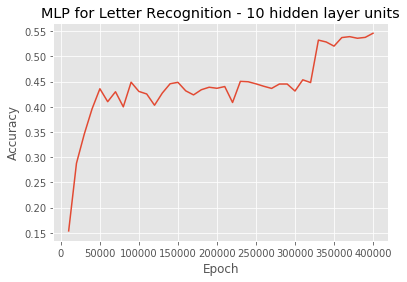

In [15]:
plt.plot([i[0] for i in accuracy_message], [i[1] for i in accuracy_message])
plt.title("MLP for Letter Recognition - 10 hidden layer units")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

<h4> Check the accuracy on test set </h4>

In [16]:
num_test = X_test.shape[0]
predicted = mlp1.predict(X_test)
num_correct = [target[predicted[index]] for index, target in enumerate(y_test)]
accuracy = sum(num_correct) / num_test
print("Accuracy on test set with (NH = 10):\t" + str(accuracy))

Accuracy on test set with (NH = 10):	0.54875


----

<h4> Increase the number of hidden layer units to 20 --> (NH=20)</h4>

In [17]:
mlp2 = MLP(16,20,26)

In [18]:
accuracy_message2 = mlp2.train(X_train=X_train, y_train=y_train)

***********************Model training start***********************
10000(Epoch)	Error(Cross entropy):	1.29986414787
20000(Epoch)	Error(Cross entropy):	0.902835558201
30000(Epoch)	Error(Cross entropy):	0.780008252582
40000(Epoch)	Error(Cross entropy):	1.61443999753
50000(Epoch)	Error(Cross entropy):	0.945274569396
60000(Epoch)	Error(Cross entropy):	2.14291871818
70000(Epoch)	Error(Cross entropy):	1.21870563955
80000(Epoch)	Error(Cross entropy):	0.927402425745
90000(Epoch)	Error(Cross entropy):	1.43427857587
100000(Epoch)	Error(Cross entropy):	2.26058476758
110000(Epoch)	Error(Cross entropy):	0.605689846692
120000(Epoch)	Error(Cross entropy):	0.754628339622
130000(Epoch)	Error(Cross entropy):	0.945600810816
140000(Epoch)	Error(Cross entropy):	0.694980696751
150000(Epoch)	Error(Cross entropy):	1.26339065491
160000(Epoch)	Error(Cross entropy):	0.59086314524
170000(Epoch)	Error(Cross entropy):	1.12624777808
180000(Epoch)	Error(Cross entropy):	0.927281878964
190000(Epoch)	Error(Cross entropy

Text(0,0.5,'Accuracy')

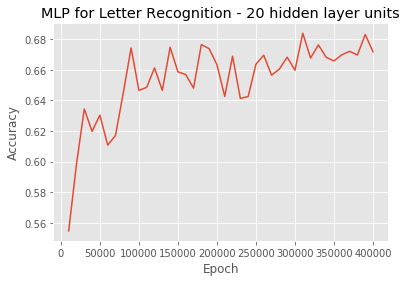

In [19]:
plt.plot([i[0] for i in accuracy_message2], [i[1] for i in accuracy_message2])
plt.title("MLP for Letter Recognition - 20 hidden layer units")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

<h4> Check the accuracy on test set </h4>

In [20]:
num_test = X_test.shape[0]
predicted = mlp2.predict(X_test)
num_correct = [target[predicted[index]] for index, target in enumerate(y_test)]
accuracy = sum(num_correct) / num_test
print("Accuracy on test set with (NH = 20):\t" + str(accuracy))

Accuracy on test set with (NH = 20):	0.66925


---

<h4> Increase the number of hidden layer units to 30 --> (NH=30)</h4>

In [21]:
mlp3 = MLP(16,30,26)

In [22]:
accuracy_message3 = mlp3.train(X_train=X_train, y_train=y_train)

***********************Model training start***********************
10000(Epoch)	Error(Cross entropy):	0.682045986861
20000(Epoch)	Error(Cross entropy):	0.703545877077
30000(Epoch)	Error(Cross entropy):	0.424030508677
40000(Epoch)	Error(Cross entropy):	1.0476409108
50000(Epoch)	Error(Cross entropy):	0.96201309398
60000(Epoch)	Error(Cross entropy):	1.75426925509
70000(Epoch)	Error(Cross entropy):	1.04839823104
80000(Epoch)	Error(Cross entropy):	1.02060083882
90000(Epoch)	Error(Cross entropy):	0.561517611007
100000(Epoch)	Error(Cross entropy):	1.21955979538
110000(Epoch)	Error(Cross entropy):	0.578170464971
120000(Epoch)	Error(Cross entropy):	0.600043463552
130000(Epoch)	Error(Cross entropy):	0.753307909429
140000(Epoch)	Error(Cross entropy):	0.310577367689
150000(Epoch)	Error(Cross entropy):	0.927636511005
160000(Epoch)	Error(Cross entropy):	0.40106708203
170000(Epoch)	Error(Cross entropy):	0.607697740085
180000(Epoch)	Error(Cross entropy):	0.302636545249
190000(Epoch)	Error(Cross entrop

Text(0,0.5,'Accuracy')

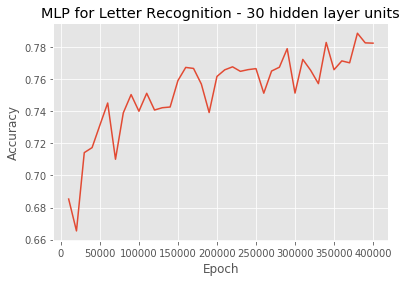

In [23]:
plt.plot([i[0] for i in accuracy_message3], [i[1] for i in accuracy_message3])
plt.title("MLP for Letter Recognition - 30 hidden layer units")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [24]:
num_test = X_test.shape[0]
predicted = mlp3.predict(X_test)
num_correct = [target[predicted[index]] for index, target in enumerate(y_test)]
accuracy = sum(num_correct) / num_test
print("Accuracy on test set with (NH = 30):\t" + str(accuracy))

Accuracy on test set with (NH = 30):	0.7785


----

<h4> Conclusion </h4>

By doing this exceptional part of the assignment, I practiced the basic process of data pre-processing, mlp model training and testing. Different from the mlp in the previous task, here the mlp is used for classification problems, **softmax function** and **cross entropy** loss function are coverd in. Experiments on different hidden layer units' size show different abilities of the model. Observably, by increasing the number of hidden layer's units (NH), the overall accuracy on train set and test set both increased.  

-----